In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).first()


('2017-08-23',)

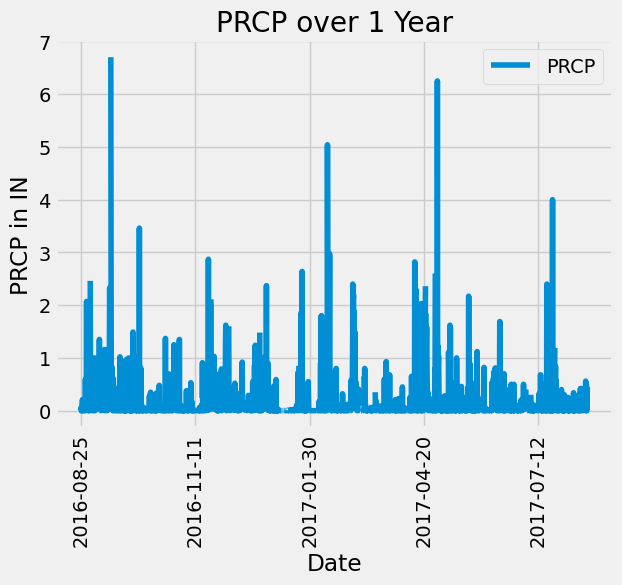

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous = dt.date(2017, 8, 23) - dt.timedelta(weeks=52)
previous

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > previous).all()
results

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=["Date", "PRCP"])
df.head()

# Sort the dataframe by date
df = df.sort_values("Date")
df.head()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x="Date", y="PRCP", rot=90)
plt.ylabel("PRCP in IN")
plt.title("PRCP over 1 Year")
plt.show()





In [25]:
df.head()

,Date,PRCP
0,2016-08-25,0.08
1003,2016-08-25,0.00
1519,2016-08-25,0.06
700,2016-08-25,0.00
359,2016-08-25,0.08


In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df.describe()
summary_statistics

,PRCP
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [36]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)) \
                        .group_by(Measurement.station) \
                       .order_by(func.count(Measurement.station).desc()) \
                        .all()

active_stations_with_counts = [(station, count) for station, count in active_stations]

print(active_stations_with_counts)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# USC00519281 is the most active station
active_station_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)) \
                                    .filter(Measurement.station == 'USC00519281') \
                                    .all()
active_station_temps

[(54.0, 85.0, 71.66378066378067)]

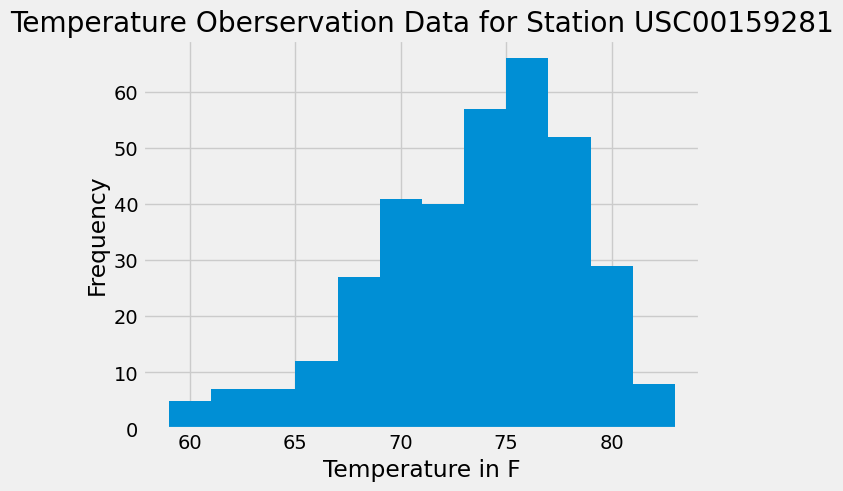

In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
previous_temp = dt.date(2017, 8, 23) - dt.timedelta(weeks=52)
previous_temp

results_temp = session.query(Measurement.tobs)\
.filter(Measurement.station == 'USC00519281')\
.filter(Measurement.date >= previous_temp)\
.all()

temperatures = [result[0] for result in results_temp]

plt.hist(temperatures, bins=12)
plt.xlabel("Temperature in F")
plt.ylabel("Frequency")
plt.title("Temperature Oberservation Data for Station USC00159281")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()